# Data Description:

This dataset from the Economic Policy Institute presents national unemployment rates in the United States from 1976 to 2024, broken down by race. It includes annual unemployment percentages for major racial groups, including Black, Hispanic, Asian American and Pacific Islander (AAPI), and White populations. The data is organized by year, allowing for a clear view of unemployment trends across different racial groups over time.


**Link to Data:** https://data.epi.org/labor_force/labor_force_unemp/line/year/national/percent_unemp/race?timeStart=1976-01-01&timeEnd=2024-01-01&dateString=2006-01-01&highlightedLines=race_aapi&highlightedLines=race_black&highlightedLines=race_hispanic

In [1]:
# Import the libraries
import sqlite3
import csv
import numpy as np
import pandas as pd

#### Note:
a cursor allows you to go through each row of data one by one.
 it comes in handy when you have to  go through each record in a set like updating and deleting data.

In [8]:
# Create a connection
conn = sqlite3.connect('unemployment.sqlite')

# Create a cursor object to navigate
cur = conn.cursor()

# SQL Basics

## Creating Tables

In [3]:
# Creating a new table called students
# The fields will be name, graduation year, and school

cur.execute(''' 
CREATE TABLE black_feminist(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    birth_year INTEGER,
    birth_place TEXT,
    activism_area TEXT
    )
''')

OperationalError: table black_feminist already exists

In [4]:
# inserting a record into the table

cur.execute('''
INSERT INTO black_feminist (name, birth_year, birth_place, activism_area) VALUES ('Ida B. Wells-Barnett', '1862', 'Holly Springs, Mississippi, USA', 'Anti-lynching')''')

conn.commit()

OperationalError: database is locked

In [6]:
# Importing mulitple records into the table
# first creating a list of the records I want to add

data = [
    ('Bell Hooks', 1952, 'Hopkinsville, Kentucky, USA', 'Intersectionality'),
    ('Frances Beal', 1940, 'United States', 'Black feminism'),
    ('Alicia Garza', 1981, 'Oakland, California, USA', 'Racial justice'),
    ('Djamila Ribeiro', 1980, 'Santos, São Paulo, Brazil', 'Black feminism'),
    ('Sueli Carneiro', 1950, 'São Paulo, Brazil', 'Anti-racism'),
    ('Amata Giramata', 1996, 'Kigali, Rwanda', 'Feminist activism'),
    ('Amina Mama', 1958, 'United Kingdom', 'Gender studies'),
    ('Altheia Jones-Lecointe', 1945, 'Trinidad', 'Black power'),
    ('Kath Locke', 1928, 'Blackpool, England', 'Education reform')
]

# Adding the data as new records.
cur.executemany('''
INSERT INTO black_feminist (name, birth_year, birth_place, activism_area) 
VALUES (?, ?, ?, ?)''', data)

# Committing the changes to the database
conn.commit()

OperationalError: database is locked

In [9]:
cur.execute('''
SELECT *
FROM black_feminist''')

cur.fetchall()

[(1,
  'Ida B. Wells-Barnett',
  1862,
  'Holly Springs, Mississippi, USA',
  'Anti-lynching'),
 (2, 'Bell Hooks', 1952, 'Hopkinsville, Kentucky, USA', 'Intersectionality'),
 (3, 'Frances Beal', 1940, 'United States', 'Black feminism'),
 (4, 'Alicia Garza', 1981, 'Oakland, California, USA', 'Racial justice'),
 (5, 'Djamila Ribeiro', 1980, 'Santos, São Paulo, Brazil', 'Black feminism'),
 (6, 'Sueli Carneiro', 1950, 'São Paulo, Brazil', 'Anti-racism'),
 (7, 'Amata Giramata', 1996, 'Kigali, Rwanda', 'Feminist activism'),
 (8, 'Amina Mama', 1958, 'United Kingdom', 'Gender studies'),
 (9, 'Altheia Jones-Lecointe', 1945, 'Trinidad', 'Black power'),
 (10, 'Kath Locke', 1928, 'Blackpool, England', 'Education reform'),
 (11,
  'Ida B. Wells-Barnett',
  1862,
  'Holly Springs, Mississippi, USA',
  'Anti-lynching'),
 (12, 'Bell Hooks', 1952, 'Hopkinsville, Kentucky, USA', 'Intersectionality'),
 (13, 'Frances Beal', 1940, 'United States', 'Black feminism'),
 (14, 'Alicia Garza', 1981, 'Oakland, Ca

In [10]:
cur.execute('''
SELECT *
FROM black_feminist
WHERE birth_year < 1950 
             ''')

cur.fetchall()

[(1,
  'Ida B. Wells-Barnett',
  1862,
  'Holly Springs, Mississippi, USA',
  'Anti-lynching'),
 (3, 'Frances Beal', 1940, 'United States', 'Black feminism'),
 (9, 'Altheia Jones-Lecointe', 1945, 'Trinidad', 'Black power'),
 (10, 'Kath Locke', 1928, 'Blackpool, England', 'Education reform'),
 (11,
  'Ida B. Wells-Barnett',
  1862,
  'Holly Springs, Mississippi, USA',
  'Anti-lynching'),
 (13, 'Frances Beal', 1940, 'United States', 'Black feminism'),
 (19, 'Altheia Jones-Lecointe', 1945, 'Trinidad', 'Black power'),
 (20, 'Kath Locke', 1928, 'Blackpool, England', 'Education reform')]

In [11]:
# Deleting the actual values from the ID Number
cur.execute('''
DELETE 
FROM black_feminist WHERE birth_year< 1929;
''')

cur.execute('''
SELECT *
FROM black_feminist;
''')
# Let's pass the result to a Pandas DataFrame
blackfeminist = pd.DataFrame(cur.fetchall())
blackfeminist.head()

,0,1,2,3,4
0,2,Bell Hooks,1952,"Hopkinsville, Kentucky, USA",Intersectionality
1,3,Frances Beal,1940,United States,Black feminism
2,4,Alicia Garza,1981,"Oakland, California, USA",Racial justice
3,5,Djamila Ribeiro,1980,"Santos, São Paulo, Brazil",Black feminism
4,6,Sueli Carneiro,1950,"São Paulo, Brazil",Anti-racism


In [17]:
cur.close()
conn.close()


# Importing unemployment file into the database

In [24]:
file= pd.read_csv("/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Data 200- Kemp/unemployed_population (1978-2023) .csv")

unemployment_data= pd.DataFrame(file)

unemployment_data.head(15)

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
5,2023-02-01,3.6,8.1,3.0,2.4,2.9,7.2,4.8,3.5,2.4,...,7.2,2.5,2.2,2.6,6.8,3.9,2.9,2.1,1.7,266112000
6,2023-01-01,3.6,8.1,3.1,2.5,2.9,7.1,4.9,3.5,2.4,...,7.4,2.5,2.2,2.7,6.7,4.0,3.0,2.1,1.7,265962000
7,2022-12-01,3.6,8.1,3.1,2.5,3.0,7.2,4.9,3.6,2.4,...,7.4,2.6,2.2,2.8,6.8,4.1,3.0,2.2,1.7,264844000
8,2022-11-01,3.7,8.1,3.2,2.6,2.9,7.3,5.0,3.6,2.5,...,7.5,2.6,2.2,2.8,6.9,4.1,3.0,2.2,1.7,264708000
9,2022-10-01,3.7,8.1,3.2,2.7,3.0,7.4,5.1,3.6,2.5,...,7.4,2.7,2.3,2.7,7.0,4.2,3.0,2.2,1.7,264535000


In [15]:
unemployment_data.shape

(536, 122)

In [18]:
# Getting rid of apostrophes first
unemployment_data = unemployment_data.rename(columns={
    "bachelor's_degree": "bachelors_degree",
    "white_men_bachelor's_degree": "white_men_bachelors_degree",
    "black_men_bachelor's_degree": "black_men_bachelors_degree",
    "hispanic_men_bachelor's_degree": "hispanic_men_bachelors_degree",
    "white_women_bachelor's_degree": "white_women_bachelors_degree",
    "black_women_bachelor's_degree": "black_women_bachelors_degree",
    "hispanic_women_bachelor's_degree": "hispanic_women_bachelors_degree"
})

# List the columns that match your SQL table
columns_to_keep = [
    "date", "all", "16-24", "25-54", "55-64", "65+", 
    "less_than_hs", "high_school", "some_college", "bachelors_degree", 
    "white_men_less_than_hs", "white_men_high_school", "white_men_some_college", 
    "white_men_bachelors_degree", "white_men_advanced_degree", "population_over_16", 
    "black_men_less_than_hs", "black_men_high_school", "black_men_some_college", 
    "black_men_bachelors_degree", "black_men_advanced_degree", "hispanic_men_less_than_hs", 
    "hispanic_men_high_school", "hispanic_men_some_college", "hispanic_men_bachelors_degree", 
    "hispanic_men_advanced_degree", "white_women_less_than_hs", "white_women_high_school", 
    "white_women_some_college", "white_women_bachelors_degree", "white_women_advanced_degree", 
    "black_women_less_than_hs", "black_women_high_school", "black_women_some_college", 
    "black_women_bachelors_degree", "black_women_advanced_degree", "hispanic_women_less_than_hs", 
    "hispanic_women_high_school", "hispanic_women_some_college", "hispanic_women_bachelors_degree", 
    "hispanic_women_advanced_degree"
]

# Filter AFTER renaming
filtered_unemployment_data = unemployment_data[columns_to_keep]

# Now save the cleaned version
filtered_unemployment_data.to_csv("/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Data 200- Kemp/filtered_unemployment_data.csv", index=False)


In [19]:
filtered_unemployment_data.shape

(536, 41)

## Adding the unemployment data to a table

In [20]:
import sqlite3

conn = sqlite3.connect("filtered_unemployment_data")  # replace with the actual file name
cur = conn.cursor()


In [25]:
#Getting my columns

# Use the cursor to DROP TABLE if it exists
cur.execute('DROP TABLE IF EXISTS filtered_unemployment_data')

# Use the cursor to CREATE TABLE
cur.execute('''
CREATE TABLE "filtered_unemployment_data"(
    id INTEGER PRIMARY KEY AUTOINCREMENT, 
    "date" TEXT,
    "all" REAL,
    "16-24" REAL,
    "25-54" REAL,
    "55-64" REAL,
    "65+" REAL,
    "less_than_hs" REAL,
    "high_school" REAL,
    "some_college" REAL,
    "bachelors_degree" REAL,
    "white_men_less_than_hs" REAL,
    "white_men_high_school" REAL,
    "white_men_some_college" REAL,
    "white_men_bachelors_degree" REAL,
    "white_men_advanced_degree" REAL,
    "population_over_16" INTEGER,
    "black_men_less_than_hs" REAL,
    "black_men_high_school" REAL,
    "black_men_some_college" REAL,
    "black_men_bachelors_degree" REAL,
    "black_men_advanced_degree" REAL,
    "hispanic_men_less_than_hs" REAL,
    "hispanic_men_high_school" REAL,
    "hispanic_men_some_college" REAL,
    "hispanic_men_bachelors_degree" REAL,
    "hispanic_men_advanced_degree" REAL,
    "white_women_less_than_hs" REAL,
    "white_women_high_school" REAL,
    "white_women_some_college" REAL,
    "white_women_bachelors_degree" REAL,
    "white_women_advanced_degree" REAL,
    "black_women_less_than_hs" REAL,
    "black_women_high_school" REAL,
    "black_women_some_college" REAL,
    "black_women_bachelors_degree" REAL,
    "black_women_advanced_degree" REAL,
    "hispanic_women_less_than_hs" REAL,
    "hispanic_women_high_school" REAL,
    "hispanic_women_some_college" REAL,
    "hispanic_women_bachelors_degree" REAL,
    "hispanic_women_advanced_degree" REAL
)
''')


In [22]:
import pandas as pd

df = pd.read_csv("/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Data 200- Kemp/filtered_unemployment_data.csv")
print("Number of columns:", len(df.columns))
print("Column names:", df.columns.tolist())


Number of columns: 41
Column names: ['date', 'all', '16-24', '25-54', '55-64', '65+', 'less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'white_men_less_than_hs', 'white_men_high_school', 'white_men_some_college', 'white_men_bachelors_degree', 'white_men_advanced_degree', 'population_over_16', 'black_men_less_than_hs', 'black_men_high_school', 'black_men_some_college', 'black_men_bachelors_degree', 'black_men_advanced_degree', 'hispanic_men_less_than_hs', 'hispanic_men_high_school', 'hispanic_men_some_college', 'hispanic_men_bachelors_degree', 'hispanic_men_advanced_degree', 'white_women_less_than_hs', 'white_women_high_school', 'white_women_some_college', 'white_women_bachelors_degree', 'white_women_advanced_degree', 'black_women_less_than_hs', 'black_women_high_school', 'black_women_some_college', 'black_women_bachelors_degree', 'black_women_advanced_degree', 'hispanic_women_less_than_hs', 'hispanic_women_high_school', 'hispanic_women_some_college', 'hispanic_women_ba

In [27]:
# inserting the data

import csv

# helper function to safely convert to float
def safe_float(value):
    try:
        return float(value)
    except:
        return None  # or 0, depending on how you want to handle bad data

filename = "/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Data 200- Kemp/filtered_unemployment_data.csv"

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    header = next(csv_reader)
    for row in csv_reader:
        # Getting the values from each row
        date = row[0]
        all_value = safe_float(row[1])
        age_16_24 = safe_float(row[2])
        age_25_54 = safe_float(row[3])
        age_55_64 = safe_float(row[4])
        age_65_plus = safe_float(row[5])
        less_than_hs = safe_float(row[6])
        high_school = safe_float(row[7])
        some_college = safe_float(row[8])
        bachelors_degree = safe_float(row[9])
        white_men_less_than_hs = safe_float(row[10])
        white_men_high_school = safe_float(row[11])
        white_men_some_college = safe_float(row[12])
        white_men_bachelors_degree = safe_float(row[13])
        white_men_advanced_degree = safe_float(row[14])
        population_over_16 = safe_float(row[15])
        black_men_less_than_hs = safe_float(row[16])
        black_men_high_school = safe_float(row[17])
        black_men_some_college = safe_float(row[18])
        black_men_bachelors_degree = safe_float(row[19])
        black_men_advanced_degree = safe_float(row[20])
        hispanic_men_less_than_hs = safe_float(row[21])
        hispanic_men_high_school = safe_float(row[22])
        hispanic_men_some_college = safe_float(row[23])
        hispanic_men_bachelors_degree = safe_float(row[24])
        hispanic_men_advanced_degree = safe_float(row[25])
        white_women_less_than_hs = safe_float(row[26])
        white_women_high_school = safe_float(row[27])
        white_women_some_college = safe_float(row[28])
        white_women_bachelors_degree = safe_float(row[29])
        white_women_advanced_degree = safe_float(row[30])
        black_women_less_than_hs = safe_float(row[31])
        black_women_high_school = safe_float(row[32])
        black_women_some_college = safe_float(row[33])
        black_women_bachelors_degree = safe_float(row[34])
        black_women_advanced_degree = safe_float(row[35])
        hispanic_women_less_than_hs = safe_float(row[36])
        hispanic_women_high_school = safe_float(row[37])
        hispanic_women_some_college = safe_float(row[38])
        hispanic_women_bachelors_degree = safe_float(row[39])
        hispanic_women_advanced_degree = safe_float(row[40])

        # Inserting it
        cur.execute('''
        INSERT INTO filtered_unemployment_data (date, "all", "16-24", "25-54", "55-64", "65+", less_than_hs, high_school, some_college, bachelors_degree, 
        white_men_less_than_hs, white_men_high_school, white_men_some_college, white_men_bachelors_degree, white_men_advanced_degree, 
        population_over_16, black_men_less_than_hs, black_men_high_school, black_men_some_college, black_men_bachelors_degree, black_men_advanced_degree,
        hispanic_men_less_than_hs, hispanic_men_high_school, hispanic_men_some_college, hispanic_men_bachelors_degree, hispanic_men_advanced_degree,
        white_women_less_than_hs, white_women_high_school, white_women_some_college, white_women_bachelors_degree, white_women_advanced_degree,
        black_women_less_than_hs, black_women_high_school, black_women_some_college, black_women_bachelors_degree, black_women_advanced_degree,
        hispanic_women_less_than_hs, hispanic_women_high_school, hispanic_women_some_college, hispanic_women_bachelors_degree, hispanic_women_advanced_degree)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', 
        (date, all_value, age_16_24, age_25_54, age_55_64, age_65_plus, less_than_hs, high_school, some_college, bachelors_degree, 
        white_men_less_than_hs, white_men_high_school, white_men_some_college, white_men_bachelors_degree, white_men_advanced_degree, 
        population_over_16, black_men_less_than_hs, black_men_high_school, black_men_some_college, black_men_bachelors_degree, black_men_advanced_degree,
        hispanic_men_less_than_hs, hispanic_men_high_school, hispanic_men_some_college, hispanic_men_bachelors_degree, hispanic_men_advanced_degree,
        white_women_less_than_hs, white_women_high_school, white_women_some_college, white_women_bachelors_degree, white_women_advanced_degree,
        black_women_less_than_hs, black_women_high_school, black_women_some_college, black_women_bachelors_degree, black_women_advanced_degree,
        hispanic_women_less_than_hs, hispanic_women_high_school, hispanic_women_some_college, hispanic_women_bachelors_degree, hispanic_women_advanced_degree))

        # Commit the changes to the database
        conn.commit()


### Removing null rows

In [29]:
cur.execute('DELETE FROM filtered_unemployment_data WHERE "all" IS NULL')
conn.commit()



### Comparing unemployment rates between races

In [36]:
cur.execute('''
SELECT AVG("white_men_bachelors_degree") AS white_men_bachelors_degree
FROM filtered_unemployment_data
''')

result = cur.fetchone()
print(" Average white men bachelors degree Unemployment:", result[0])


 Average white men bachelors degree Unemployment: 2.828358208955214


In [35]:
cur.execute('''
SELECT AVG("black_men_bachelors_degree") AS black_men_bachelors_degree
FROM filtered_unemployment_data
''')

result = cur.fetchone()
print(" Average black men bachelors degree Unemployment:", result[0])

 Average black men bachelors degree Unemployment: 5.193283582089558


In [34]:
cur.execute('''
SELECT AVG("black_women_bachelors_degree") AS black_women_bachelors_degree
FROM filtered_unemployment_data
''')

result = cur.fetchone()
print(" Average black women bachelors degree Unemployment:", result[0])

 Average black women bachelors degree Unemployment: 4.885261194029845


In [37]:
cur.execute('''
SELECT AVG("white_women_bachelors_degree") AS white_women_bachelors_degree
FROM filtered_unemployment_data
''')

result = cur.fetchone()
print(" Average white women bachelors degree Unemployment:", result[0])

 Average white women bachelors degree Unemployment: 3.020708955223886


In [41]:
cur.execute('''
SELECT 
    AVG(white_men_advanced_degree),
    AVG(white_women_advanced_degree),
    AVG(black_men_advanced_degree),
    AVG(black_women_advanced_degree)
FROM filtered_unemployment_data
''')

result = cur.fetchone()

print("White men:", result[0])
print("White women:", result[1])
print("Black men:", result[2])
print("Black women:", result[3])



White men: 1.9210820895522422
White women: 2.3223880597015003
Black men: 3.6908582089552193
Black women: 3.0919776119403


# Visualizations

In [51]:
import matplotlib.pyplot as plt
import altair as alt

In [57]:
cur.execute('''
SELECT 
    AVG(white_men_advanced_degree),
    AVG(white_women_advanced_degree),
    AVG(black_men_advanced_degree),
    AVG(black_women_advanced_degree)
FROM filtered_unemployment_data
''')

result = cur.fetchone()

data = pd.DataFrame({
    'Group': ["White Men", "White Women", "Black Men", "Black Women"],
    'Unemployment Rate': result
})

chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Group', sort=None),
    y='Unemployment Rate',
    color=alt.Color('Group', scale=alt.Scale(scheme='purples'))
).properties(
    title="Average Unemployment Rate (Advanced Degree)",
    width=500,
    height=300
)

chart.display()


alt.Chart(...)

In [58]:
cur.execute('''
SELECT 
    AVG(white_men_bachelors_degree),
    AVG(white_women_bachelors_degree),
    AVG(black_men_bachelors_degree),
    AVG(black_women_bachelors_degree)
FROM filtered_unemployment_data
''')

result = cur.fetchone()

# Prepare the data for Altair
data = pd.DataFrame({
    'Group': ["White Men", "White Women", "Black Men", "Black Women"],
    'Unemployment Rate': result
})

# Create the bar chart
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Group', sort=None),
    y='Unemployment Rate',
   color=alt.Color('Group', scale=alt.Scale(scheme='blues'))
).properties(
    title="Average Unemployment Rate (Bachelor's Degree)",
    width=500,
    height=300
)

chart.display()


alt.Chart(...)

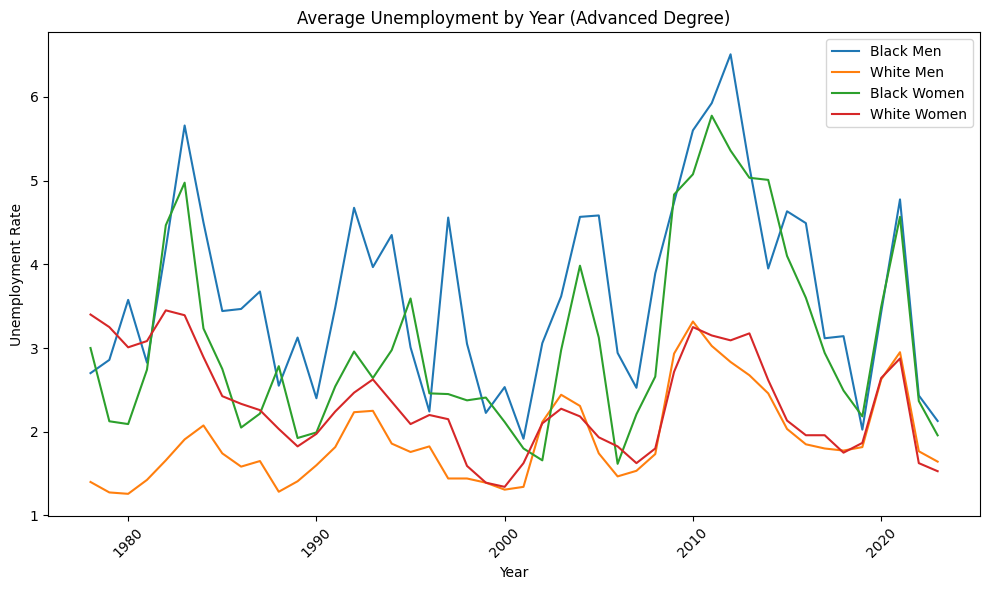

In [62]:
cur.execute('''
SELECT date, 
       black_men_advanced_degree, 
       white_men_advanced_degree,
       black_women_advanced_degree,
       white_women_advanced_degree
FROM filtered_unemployment_data
''')

rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['date', 'black_men', 'white_men', 'black_women', 'white_women'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

df_yearly = df.groupby('year')[['black_men', 'white_men', 'black_women', 'white_women']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly['year'], df_yearly['black_men'], label='Black Men')
plt.plot(df_yearly['year'], df_yearly['white_men'], label='White Men')
plt.plot(df_yearly['year'], df_yearly['black_women'], label='Black Women')
plt.plot(df_yearly['year'], df_yearly['white_women'], label='White Women')

plt.title("Average Unemployment by Year (Advanced Degree)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

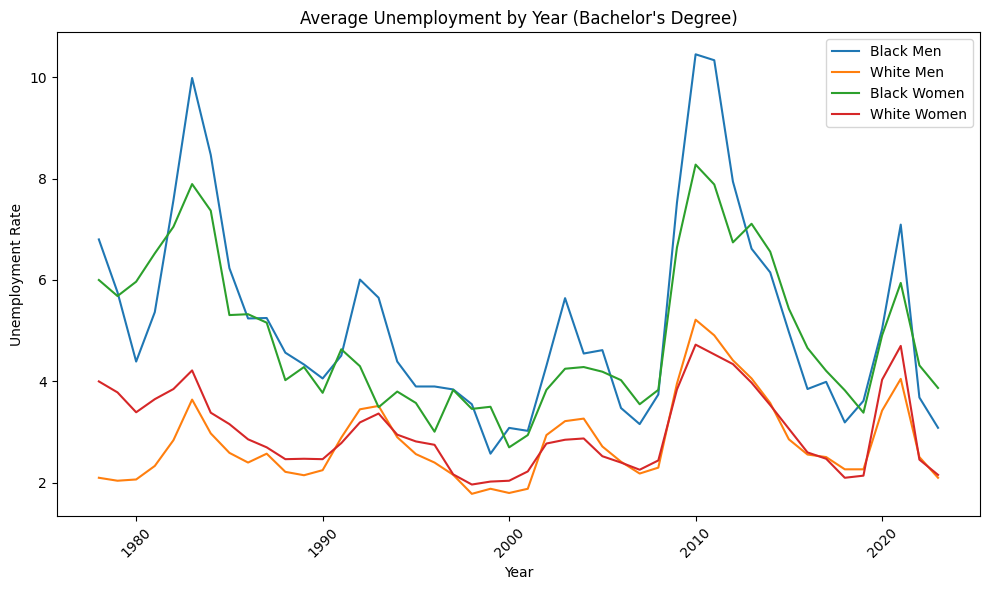

In [63]:
cur.execute('''
SELECT date, 
       black_men_bachelors_degree, 
       white_men_bachelors_degree,
       black_women_bachelors_degree,
       white_women_bachelors_degree
FROM filtered_unemployment_data
''')

rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['date', 'black_men', 'white_men', 'black_women', 'white_women'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

df_yearly = df.groupby('year')[['black_men', 'white_men', 'black_women', 'white_women']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly['year'], df_yearly['black_men'], label='Black Men')
plt.plot(df_yearly['year'], df_yearly['white_men'], label='White Men')
plt.plot(df_yearly['year'], df_yearly['black_women'], label='Black Women')
plt.plot(df_yearly['year'], df_yearly['white_women'], label='White Women')

plt.title("Average Unemployment by Year (Bachelor's Degree)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Observations

- Black men consistently experience the highest unemployment rates, regardless of whether they hold a bachelor's or an advanced degree. This trend is visible across nearly every year.

- Economic downturns (like 2008 and 2020) spike unemployment across all groups, but the spikes are sharper and more severe for Black men and women, especially those with bachelor’s degrees.

- While higher education helps reduce unemployment for everyone, it doesn’t eliminate racial disparities. White men and women consistently have lower unemployment than Black men and women with the same level of education.


